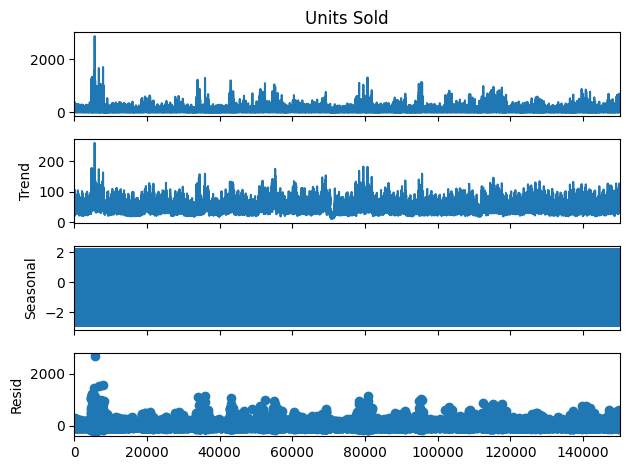

ADF Statistic: -32.65317399947924
p-value: 0.0
Critical Values: {'1%': -3.430393574582239, '5%': -2.8615592593534824, '10%': -2.5667802510675894}
Data is stationary
Root Mean Squared Error (RMSE): 462424.49130542076


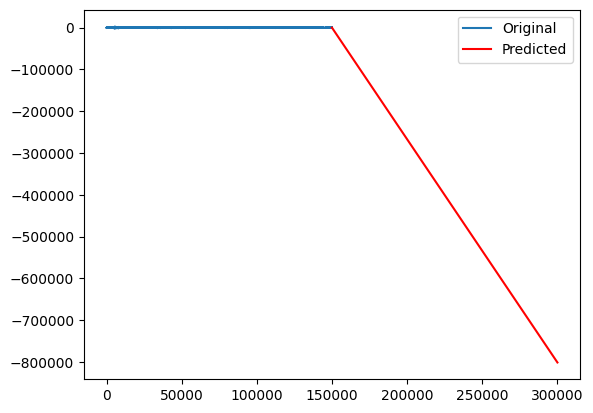

In [36]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("adsdataset2.csv")

# Decompose the time series with the specified seasonality period (your_period)
your_period = 12  # Specify the seasonality period, e.g., 12 for monthly data with yearly seasonality
result = seasonal_decompose(data['Units Sold'], model='additive', period=24)
result.plot()
plt.show()

# Check for stationarity
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary")

test_stationarity(data['Units Sold'])

# Differencing to achieve stationarity (if necessary)
data['Units Sold_diff'] = data['Units Sold'] - data['Units Sold'].shift(1)
data['Units Sold_diff'].dropna(inplace=True)

# Handle missing values by filling with mean
data['Units Sold_diff'].fillna(data['Units Sold_diff'].mean(), inplace=True)

# Build the ARIMA model
model = ARIMA(data['Units Sold'], order=(1, 2, 0))
model_fit = model.fit()

# Predictions
predictions = model_fit.forecast(steps=len(data['Units Sold_diff']))
mse = mean_squared_error(data['Units Sold_diff'], predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the original and predicted time series
plt.plot(data['Units Sold_diff'], label='Original')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()


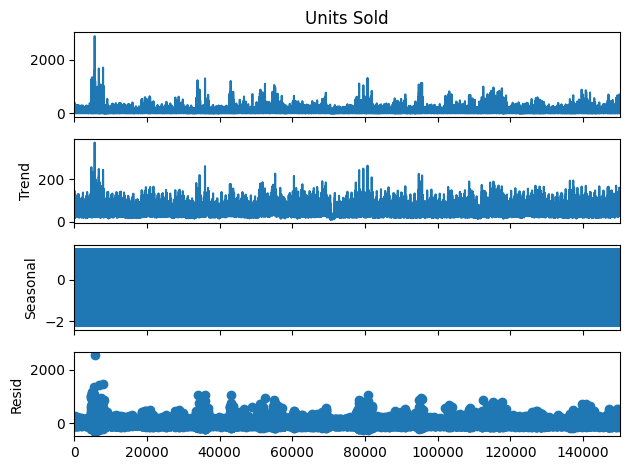

ADF Statistic: -32.65317399947924
p-value: 0.0
Critical Values: {'1%': -3.430393574582239, '5%': -2.8615592593534824, '10%': -2.5667802510675894}
Data is stationary
Root Mean Squared Error (RMSE): 75.77136940577527


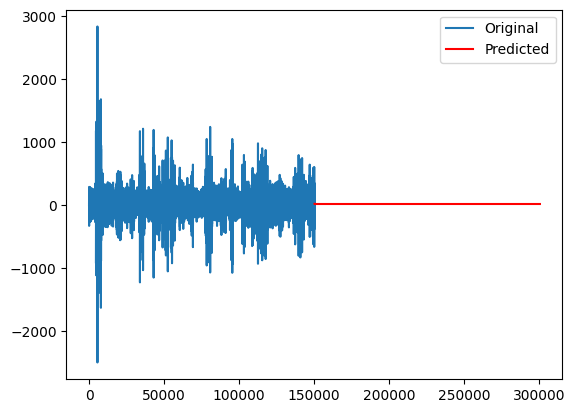

In [23]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("adsdataset2.csv")

# Decompose the time series with the specified seasonality period (your_period)
your_period = 1  # Specify the seasonality period, e.g., 12 for monthly data with yearly seasonality
result = seasonal_decompose(data['Units Sold'], model='additive', period=your_period)
result.plot()
plt.show()

# Check for stationarity
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary")

test_stationarity(data['Units Sold'])

# Previous code ...

# Differencing to achieve stationarity (if necessary)
data['Units Sold_diff'] = data['Units Sold'] - data['Units Sold'].shift(1)
data['Units Sold_diff'].fillna(0, inplace=True)  # Fill missing values with zero

# Calculate the mean squared error
mse = mean_squared_error(data['Units Sold_diff'], predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Rest of the code ...



# Plot the original and predicted time series
plt.plot(data['Units Sold_diff'], label='Original')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()


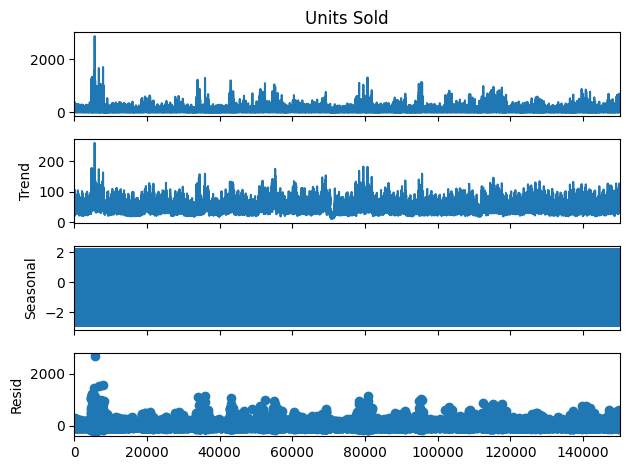

ADF Statistic: -32.65317399947924
p-value: 0.0
Critical Values: {'1%': -3.430393574582239, '5%': -2.8615592593534824, '10%': -2.5667802510675894}
Data is stationary
Root Mean Squared Error (RMSE): 3851606.987101523


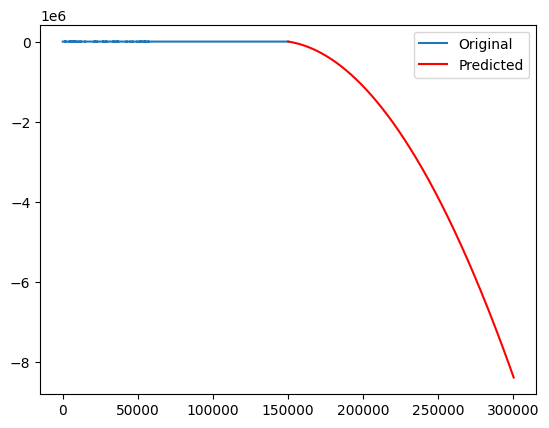

In [35]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("adsdataset2.csv")

# Adjust the ARIMA order based on your data characteristics
p, d, q = 2,3 , 1# Modify these values

# Decompose the time series
your_period = 24 # Specify the seasonality period, e.g., 1 for daily data with daily seasonality
result = seasonal_decompose(data['Units Sold'], model='additive', period=your_period)
result.plot()
plt.show()

# Check for stationarity
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary")

test_stationarity(data['Units Sold'])

# Differencing to achieve stationarity (if necessary)
data['Units Sold_diff'] = data['Units Sold'] - data['Units Sold'].shift(1)
data['Units Sold_diff'].fillna(0, inplace=True)  # Fill missing values with zero

# Build the ARIMA model with adjusted order
model = ARIMA(data['Units Sold'], order=(p, d, q))
model_fit = model.fit()

# Predictions
predictions = model_fit.forecast(steps=len(data['Units Sold_diff']))
mse = mean_squared_error(data['Units Sold_diff'], predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the original and predicted time series
plt.plot(data['Units Sold_diff'], label='Original')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()
